In [3]:
import numpy as np
eps = 0.25

def payoff(a1,a2):
    if a1>a2:
        return 1-a1-eps
    elif a1==a2:
        return (1-a1-eps)/2
    else:
        return 0

def payoff2(a1,a2):
    if a1>a2:
        return 1-a2-eps
    elif a1==a2:
        return (1-a2-eps)/2
    else:
        return 0

N = 2
action2bid = np.linspace(0,1,N+1)
R = np.zeros((N+1,N+1))
for i in range(N+1):
    for j in range(N+1):
        R[i,j] = payoff(action2bid[i],action2bid[j])

np.round(R,2)
print(R)
R = R[0:N,0:N]
A = R
B = R.T
print(A)
print(B)

[[ 0.375  0.     0.   ]
 [ 0.25   0.125  0.   ]
 [-0.25  -0.25  -0.125]]
[[0.375 0.   ]
 [0.25  0.125]]
[[0.375 0.25 ]
 [0.    0.125]]


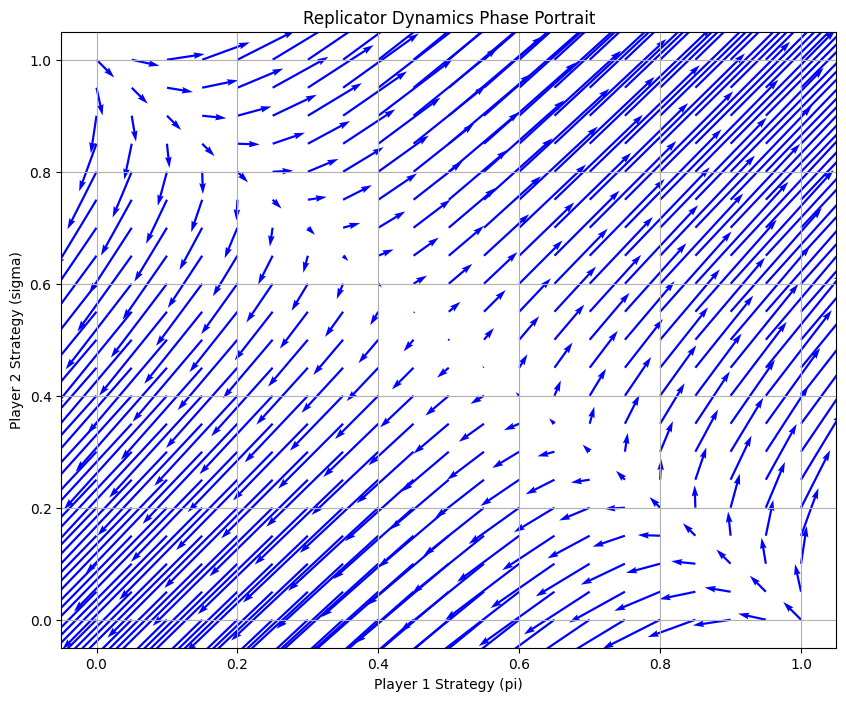

Initial pi = 1.00, Initial sigma = 0.10, Final pi = 1.15, Final sigma = 1.07
Initial pi = 0.95, Initial sigma = 0.15, Final pi = 1.14, Final sigma = 1.08
Initial pi = 1.00, Initial sigma = 0.15, Final pi = 1.45, Final sigma = 1.38
Initial pi = 0.90, Initial sigma = 0.20, Final pi = 1.14, Final sigma = 1.08
Initial pi = 0.95, Initial sigma = 0.20, Final pi = 1.44, Final sigma = 1.38
Initial pi = 1.00, Initial sigma = 0.20, Final pi = 1.75, Final sigma = 1.69
Initial pi = 0.85, Initial sigma = 0.25, Final pi = 1.13, Final sigma = 1.08
Initial pi = 0.90, Initial sigma = 0.25, Final pi = 1.44, Final sigma = 1.39
Initial pi = 0.95, Initial sigma = 0.25, Final pi = 1.75, Final sigma = 1.69
Initial pi = 1.00, Initial sigma = 0.25, Final pi = 2.05, Final sigma = 1.99
Initial pi = 0.80, Initial sigma = 0.30, Final pi = 1.13, Final sigma = 1.09
Initial pi = 0.85, Initial sigma = 0.30, Final pi = 1.44, Final sigma = 1.39
Initial pi = 0.90, Initial sigma = 0.30, Final pi = 1.74, Final sigma = 1.69

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1
tau = 0.02

# Create a grid of initial mixed strategy probabilities for player 1 and player 2
initial_conditions = np.linspace(0, 1, 21)

# Create a grid for the phase portrait
grid_size = len(initial_conditions)
pi_grid, sigma_grid = np.meshgrid(initial_conditions, initial_conditions)

pi_trajectories = np.zeros_like(pi_grid)
sigma_trajectories = np.zeros_like(sigma_grid)

# Define the Replicator Dynamics equations for both players
def policy_replicator_dynamics(t, p):
    pi = p[0]
    sigma = p[1]
    Asigma = np.dot(A, [sigma, 1 - sigma])
    delta_pi = alpha * (Asigma[0] - Asigma[1])
    piB = np.dot(np.array([pi, 1 - pi]).T, B)
    delta_sigma = alpha * (piB[0] - piB[1])
    return [delta_pi, delta_sigma]

for i in range(grid_size):
    for j in range(grid_size):
        initial_p = [pi_grid[i, j], sigma_grid[i, j]]
        sol = solve_ivp(policy_replicator_dynamics, (0, 100), initial_p, t_eval=np.linspace(0, 100, 1000))
        pi_trajectories[i, j] = sol.y[0][-1]
        sigma_trajectories[i, j] = sol.y[1][-1]

plt.figure(figsize=(10, 8))
plt.quiver(pi_grid, sigma_grid, pi_trajectories - pi_grid, sigma_trajectories - sigma_grid, scale=20, color='b')
plt.xlabel('Player 1 Strategy (pi)')
plt.ylabel('Player 2 Strategy (sigma)')
plt.title('Replicator Dynamics Phase Portrait')
plt.grid()
plt.show()

for i in range(grid_size):
    for j in range(grid_size):
        if pi_trajectories[i, j] >= 1.0 and sigma_trajectories[i, j] >= 1.0:
            print(f"Initial pi = {pi_grid[i, j]:.2f}, Initial sigma = {sigma_grid[i, j]:.2f}, Final pi = {pi_trajectories[i, j]:.2f}, Final sigma = {sigma_trajectories[i, j]:.2f}")
